Loading mouse disorder data...
Loading rat disorder data...
Total mouse phosphorylation sites: 30442
Total rat phosphorylation sites: 23004

Mouse data:
Phosphorylation sites in disordered regions: 19517
Phosphorylation sites in ordered regions: 9967
Phosphorylation sites with no disorder data: 958

Rat data:
Phosphorylation sites in disordered regions: 13897
Phosphorylation sites in ordered regions: 7136
Phosphorylation sites with no disorder data: 1971

Percentages Mouse Phosphorylation (excluding no data):
Disordered regions: 66.2%
Ordered regions: 33.8%

Percentages Rat Phosphorylation (excluding no data):
Disordered regions: 66.1%
Ordered regions: 33.9%


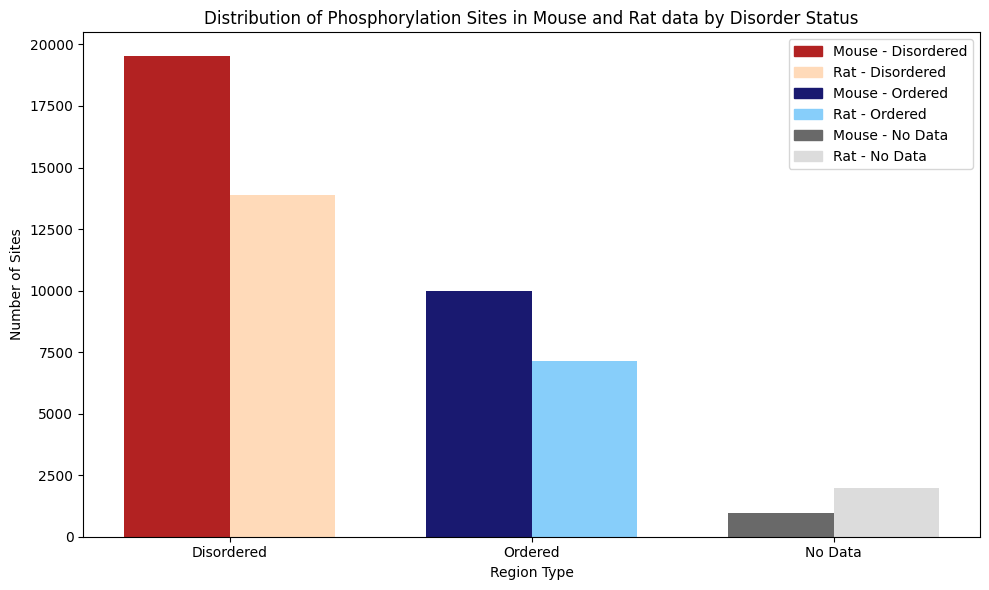

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the mouse disorder data
print("Loading mouse disorder data...")
df_mouse = pd.read_csv('../data/processed/mouse/full_disorder.csv')

print("Loading rat disorder data...")
df_rat = pd.read_csv('../data/processed/rat/full_disorder.csv')


print(f"Total mouse phosphorylation sites: {len(df_mouse)}")
print(f"Total rat phosphorylation sites: {len(df_rat)}")

# Count phosphorylations by disorder status (PM = phosphorylation mouse, PR = phosphorylation rat)
PM_disordered_count = len(df_mouse[df_mouse['disordered?'] == 1])
PM_ordered_count = len(df_mouse[df_mouse['disordered?'] == 0])
PM_no_data_count = len(df_mouse[df_mouse['disordered?'].isna()])

PR_disordered_count = len(df_rat[df_rat['disordered?'] == 1])
PR_ordered_count = len(df_rat[df_rat['disordered?'] == 0])
PR_no_data_count = len(df_rat[df_rat['disordered?'].isna()])

print(f"\nMouse data:")
print(f"Phosphorylation sites in disordered regions: {PM_disordered_count}")
print(f"Phosphorylation sites in ordered regions: {PM_ordered_count}")
print(f"Phosphorylation sites with no disorder data: {PM_no_data_count}")

print(f"\nRat data:")
print(f"Phosphorylation sites in disordered regions: {PR_disordered_count}")
print(f"Phosphorylation sites in ordered regions: {PR_ordered_count}")
print(f"Phosphorylation sites with no disorder data: {PR_no_data_count}")

# Calculate percentages Mouse data
total_PM_with_data = PM_disordered_count + PM_ordered_count
if total_PM_with_data > 0:
    PM_disordered_pct = (PM_disordered_count / total_PM_with_data) * 100
    PM_ordered_pct = (PM_ordered_count / total_PM_with_data) * 100
    
    print(f"\nPercentages Mouse Phosphorylation (excluding no data):")
    print(f"Disordered regions: {PM_disordered_pct:.1f}%")
    print(f"Ordered regions: {PM_ordered_pct:.1f}%")

# Calculate percentages Rat data
total_PR_with_data = PR_disordered_count + PR_ordered_count
if total_PR_with_data > 0:
    PR_disordered_pct = (PR_disordered_count / total_PR_with_data) * 100
    PR_ordered_pct = (PR_ordered_count / total_PR_with_data) * 100
    
    print(f"\nPercentages Rat Phosphorylation (excluding no data):")
    print(f"Disordered regions: {PR_disordered_pct:.1f}%")
    print(f"Ordered regions: {PR_ordered_pct:.1f}%")

# Create a simple bar chart
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
categories = ['Disordered', 'Ordered', 'No Data']
mouse_counts = [PM_disordered_count, PM_ordered_count, PM_no_data_count]
rat_counts = [PR_disordered_count, PR_ordered_count, PR_no_data_count]
mouse_colors = ['firebrick', 'midnightblue', 'dimgray']  # Darker colors for Mouse
rat_colors = ['peachpuff', 'lightskyblue', 'gainsboro']  # Lighter colors for Rat

x = np.arange(len(categories))
width = 0.35

for i in range(len(categories)):
    plt.bar(x[i] - width/2, mouse_counts[i], width, color=mouse_colors[i])
    plt.bar(x[i] + width/2, rat_counts[i], width, color=rat_colors[i])

# Create custom legend entries
legend_elements = []
for i, category in enumerate(categories):
    legend_elements.append(mpatches.Patch(color=mouse_colors[i], label=f'Mouse - {category}'))
    legend_elements.append(mpatches.Patch(color=rat_colors[i], label=f'Rat - {category}'))

plt.xlabel('Region Type')
plt.ylabel('Number of Sites')
plt.title('Distribution of Phosphorylation Sites in Mouse and Rat data by Disorder Status')
plt.xticks(x, categories)
plt.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()


In [39]:
# Total S/T/Y residues in mouse and rat data
import os
import glob

# Count all S, T, Y residues from PUNCH2 results for mouse
print("Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...")

Mouse_punch2_dir = "../outputs/punch2/Punch2_results_mouse"
Mouse_punch2_files = glob.glob(os.path.join(Mouse_punch2_dir, "*.csv"))

if not Mouse_punch2_files:
    print(f"Error: No PUNCH2 files found in {Mouse_punch2_dir}")
else:
    print(f"Found {len(Mouse_punch2_files)} PUNCH2 result files")

    # Initialize counters for each amino acid type
    # Disordered regions
    Mouse_s_disordered = 0
    Mouse_t_disordered = 0
    Mouse_y_disordered = 0
    
    # Ordered regions
    Mouse_s_ordered = 0
    Mouse_t_ordered = 0
    Mouse_y_ordered = 0
    
    # Totals
    Mouse_s_total = 0
    Mouse_t_total = 0
    Mouse_y_total = 0

    Mouse_total_ordered = 0
    Mouse_total_disordered = 0
    # Count all S/T/Y residues by disorder status
   
    Mouse_files_processed = 0
    
    for file_path in Mouse_punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]

                    #Count total ordered and disordered residues
                    if disorder_prediction == '1':
                        Mouse_total_disordered += 1
                    elif disorder_prediction == '0':
                        Mouse_total_ordered += 1

                    # Count each amino acid type individually
                    if amino_acid == 'S':
                        Mouse_s_total += 1
                        if disorder_prediction == '1':
                            Mouse_s_disordered += 1
                        elif disorder_prediction == '0':
                            Mouse_s_ordered += 1
                    elif amino_acid == 'T':
                        Mouse_t_total += 1
                        if disorder_prediction == '1':
                            Mouse_t_disordered += 1
                        elif disorder_prediction == '0':
                            Mouse_t_ordered += 1
                    elif amino_acid == 'Y':
                        Mouse_y_total += 1
                        if disorder_prediction == '1':
                            Mouse_y_disordered += 1
                        elif disorder_prediction == '0':
                            Mouse_y_ordered += 1
            
            Mouse_files_processed += 1
            if Mouse_files_processed % 1000 == 0:
                print(f"Processed {Mouse_files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {Mouse_files_processed} Mouse PUNCH2 files")
    print(f"Total S residues in disordered regions: {Mouse_s_disordered}")
    print(f"Total S residues in ordered regions: {Mouse_s_ordered}")
    print(f"Total S residues: {Mouse_s_total}")

    print(f"\nTotal T residues in disordered regions: {Mouse_t_disordered}")
    print(f"Total T residues in ordered regions: {Mouse_t_ordered}")
    print(f"Total T residues: {Mouse_t_total}")

    print(f"\nTotal Y residues in disordered regions: {Mouse_y_disordered}")
    print(f"Total Y residues in ordered regions: {Mouse_y_ordered}")
    print(f"Total Y residues: {Mouse_y_total}")
    
    # Calculate total S/T/Y residues
    Mouse_total_sty_residues = Mouse_s_total + Mouse_t_total + Mouse_y_total
    Mouse_total_sty_disordered = Mouse_s_disordered + Mouse_t_disordered + Mouse_y_disordered
    Mouse_total_sty_ordered = Mouse_s_ordered + Mouse_t_ordered + Mouse_y_ordered

    print(f"\nTotal S/T/Y residues: {Mouse_total_sty_residues}")
    print(f"Total S/T/Y residues in disordered regions: {Mouse_total_sty_disordered}")
    print(f"Total S/T/Y residues in ordered regions: {Mouse_total_sty_ordered}")

    #Calculate total residues
    Mouse_total_residues = Mouse_total_ordered + Mouse_total_disordered

    print(f"Total ordered residues: {Mouse_total_ordered}")
    print(f"Total disordered residues: {Mouse_total_disordered}")
    print(f"Total residues: {Mouse_total_residues}")

    # Calculate percentages
    if Mouse_total_sty_residues > 0:
        Mouse_disordered_pct = (Mouse_total_sty_disordered / Mouse_total_sty_residues) * 100
        Mouse_ordered_pct = (Mouse_total_sty_ordered / Mouse_total_sty_residues) * 100
        
        print(f"\nPercentages of all S/T/Y residues:")
        print(f"Disordered regions: {Mouse_disordered_pct:.1f}%")
        print(f"Ordered regions: {Mouse_ordered_pct:.1f}%")

# Analyze Rat data  
print(f"\nAnalyzing all S, T, Y residues from PUNCH2 results (Rat)...")

rat_punch2_dir = "../outputs/punch2/Punch2_results_rat"
rat_punch2_files = glob.glob(os.path.join(rat_punch2_dir, "*.csv"))

if not rat_punch2_files:
    print(f"Error: No PUNCH2 files found in {rat_punch2_dir}")
else:
    print(f"Found {len(rat_punch2_files)} Rat PUNCH2 result files")

    # Initialize counters for each amino acid type
    # Disordered regions
    Rat_s_disordered = 0
    Rat_t_disordered = 0
    Rat_y_disordered = 0
    
    # Ordered regions
    Rat_s_ordered = 0
    Rat_t_ordered = 0
    Rat_y_ordered = 0
    
    # Totals
    Rat_s_total = 0
    Rat_t_total = 0
    Rat_y_total = 0

    Rat_total_ordered = 0
    Rat_total_disordered = 0

    # Count all S/T/Y residues by disorder status
   
    Rat_files_processed = 0
    
    for file_path in rat_punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    #Count total ordered and disordered residues
                    if disorder_prediction == '1':
                        Rat_total_disordered += 1
                    elif disorder_prediction == '0':
                        Rat_total_ordered += 1

                    # Count each amino acid type individually
                    if amino_acid == 'S':
                        Rat_s_total += 1
                        if disorder_prediction == '1':
                            Rat_s_disordered += 1
                        elif disorder_prediction == '0':
                            Rat_s_ordered += 1
                    elif amino_acid == 'T':
                        Rat_t_total += 1
                        if disorder_prediction == '1':
                            Rat_t_disordered += 1
                        elif disorder_prediction == '0':
                            Rat_t_ordered += 1
                    elif amino_acid == 'Y':
                        Rat_y_total += 1
                        if disorder_prediction == '1':
                            Rat_y_disordered += 1
                        elif disorder_prediction == '0':
                            Rat_y_ordered += 1
            
            Rat_files_processed += 1
            if Rat_files_processed % 1000 == 0:
                print(f"Processed {Rat_files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {Rat_files_processed} Rat PUNCH2 files")
    print(f"Total S residues in disordered regions: {Rat_s_disordered}")
    print(f"Total S residues in ordered regions: {Rat_s_ordered}")
    print(f"Total S residues: {Rat_s_total}")

    print(f"\nTotal T residues in disordered regions: {Rat_t_disordered}")
    print(f"Total T residues in ordered regions: {Rat_t_ordered}")
    print(f"Total T residues: {Rat_t_total}")

    print(f"\nTotal Y residues in disordered regions: {Rat_y_disordered}")
    print(f"Total Y residues in ordered regions: {Rat_y_ordered}")
    print(f"Total Y residues: {Rat_y_total}")
    
    # Calculate total S/T/Y residues
    Rat_total_sty_residues = Rat_s_total + Rat_t_total + Rat_y_total
    Rat_total_sty_disordered = Rat_s_disordered + Rat_t_disordered + Rat_y_disordered
    Rat_total_sty_ordered = Rat_s_ordered + Rat_t_ordered + Rat_y_ordered

    print(f"\nTotal S/T/Y residues: {Rat_total_sty_residues}")
    print(f"Total S/T/Y residues in disordered regions: {Rat_total_sty_disordered}")
    print(f"Total S/T/Y residues in ordered regions: {Rat_total_sty_ordered}")

    # Calculate total residues
    Rat_total_residues = Rat_total_ordered + Rat_total_disordered
  
    print(f"Total ordered residues: {Rat_total_ordered}")
    print(f"Total disordered residues: {Rat_total_disordered}")
    print(f"Total residues: {Rat_total_residues}")

    # Calculate percentages
    if Rat_total_sty_residues > 0:
        Rat_disordered_pct = (Rat_total_sty_disordered / Rat_total_sty_residues) * 100
        Rat_ordered_pct = (Rat_total_sty_ordered / Rat_total_sty_residues) * 100
        
        print(f"\nPercentages of all S/T/Y residues:")
        print(f"Disordered regions: {Rat_disordered_pct:.1f}%")
        print(f"Ordered regions: {Rat_ordered_pct:.1f}%")

Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...
Found 6015 PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...
Processed 6000 files...

Processed 6015 Mouse PUNCH2 files
Total S residues in disordered regions: 178525
Total S residues in ordered regions: 256600
Total S residues: 435125

Total T residues in disordered regions: 72638
Total T residues in ordered regions: 183154
Total T residues: 255792

Total Y residues in disordered regions: 12972
Total Y residues in ordered regions: 102144
Total Y residues: 115116

Total S/T/Y residues: 806033
Total S/T/Y residues in disordered regions: 264135
Total S/T/Y residues in ordered regions: 541898
Total ordered residues: 3529137
Total disordered residues: 1268786
Total residues: 4797923

Percentages of all S/T/Y residues:
Disordered regions: 32.8%
Ordered regions: 67.2%

Analyzing all S, T, Y residues from PUNCH2 results (Rat)...
Found 5772 Rat

Calculating phosphorylation enrichment for mouse data...
Percentage of phosphorylated residues in disordered regions: 7.389%
  (19517 phosphorylated out of 264135 total S/T/Y residues)
Percentage of phosphorylated residues in ordered regions: 1.839%
  (9967 phosphorylated out of 541898 total S/T/Y residues)

Enrichment ratio (disordered/ordered): 4.02x
→ Phosphorylation is 4.02x more enriched in disordered regions

Calculating phosphorylation enrichment for rat data...
Percentage of phosphorylated residues in disordered regions: 5.636%
  (13897 phosphorylated out of 246567 total S/T/Y residues)
Percentage of phosphorylated residues in ordered regions: 1.375%
  (7136 phosphorylated out of 519128 total S/T/Y residues)

Enrichment ratio (disordered/ordered): 4.10x
→ Phosphorylation is 4.10x more enriched in disordered regions


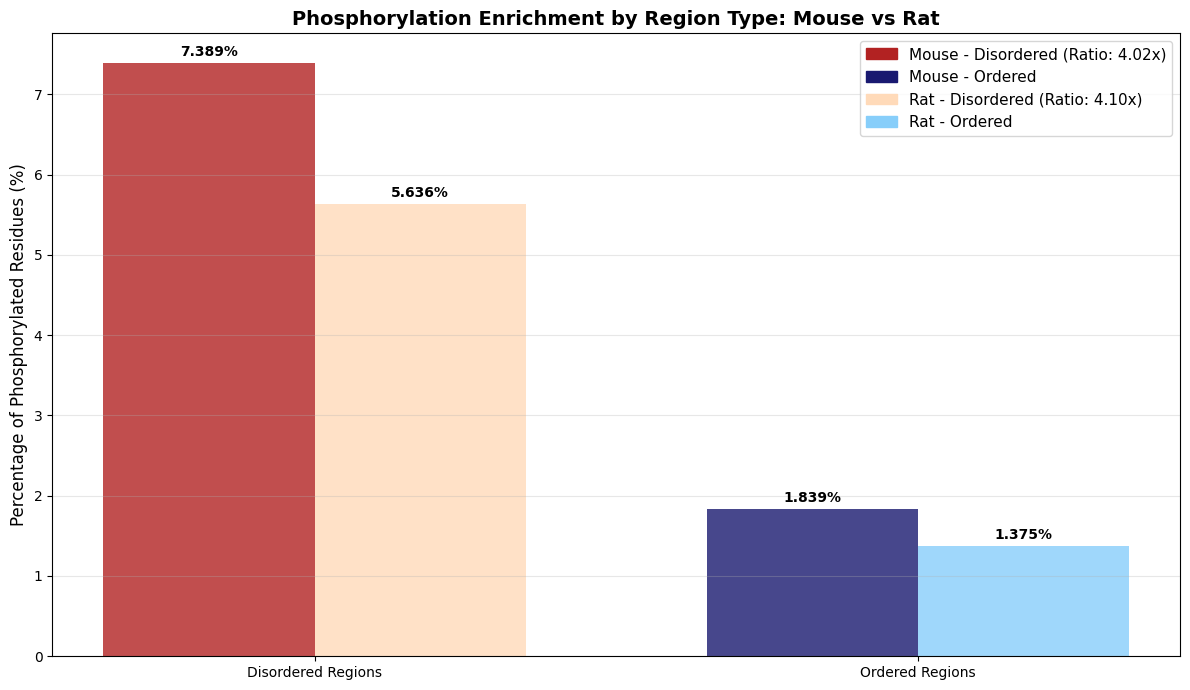

In [13]:
# Calculate phosphorylation enrichment for mouse data 
print("Calculating phosphorylation enrichment for mouse data...")

# Percentage of phosphorylated residues in disordered regions
if Mouse_total_sty_disordered > 0:
    PM_in_disordered_pct = (PM_disordered_count / Mouse_total_sty_disordered) * 100
    print(f"Percentage of phosphorylated residues in disordered regions: {PM_in_disordered_pct:.3f}%")
    print(f"  ({PM_disordered_count} phosphorylated out of {Mouse_total_sty_disordered} total S/T/Y residues)")
else:
    PM_in_disordered_pct = 0
    print("No S/T/Y residues found in disordered regions")

# Percentage of phosphorylated residues in ordered regions
if Mouse_total_sty_ordered > 0:
    PM_in_ordered_pct = (PM_ordered_count / Mouse_total_sty_ordered) * 100
    print(f"Percentage of phosphorylated residues in ordered regions: {PM_in_ordered_pct:.3f}%")
    print(f"  ({PM_ordered_count} phosphorylated out of {Mouse_total_sty_ordered} total S/T/Y residues)")
else:
    PM_in_ordered_pct = 0
    print("No S/T/Y residues found in ordered regions")

# Calculate enrichment ratio
if PM_in_ordered_pct > 0:
    PM_enrichment_ratio = PM_in_disordered_pct / PM_in_ordered_pct
    print(f"\nEnrichment ratio (disordered/ordered): {PM_enrichment_ratio:.2f}x")
    if PM_enrichment_ratio > 1:
        print(f"→ Phosphorylation is {PM_enrichment_ratio:.2f}x more enriched in disordered regions")
    elif PM_enrichment_ratio < 1:
        print(f"→ Phosphorylation is {1/PM_enrichment_ratio:.2f}x more enriched in ordered regions")
    else:
        print("→ Phosphorylation shows equal enrichment in both regions")

# Calculate phosphorylation enrichment for rat data
print("\nCalculating phosphorylation enrichment for rat data...")

# Percentage of phosphorylated residues in disordered regions
if Rat_total_sty_disordered > 0:
    PR_in_disordered_pct = (PR_disordered_count / Rat_total_sty_disordered) * 100
    print(f"Percentage of phosphorylated residues in disordered regions: {PR_in_disordered_pct:.3f}%")
    print(f"  ({PR_disordered_count} phosphorylated out of {Rat_total_sty_disordered} total S/T/Y residues)")
else:
    PR_in_disordered_pct = 0
    print("No S/T/Y residues found in disordered regions")

# Percentage of phosphorylated residues in ordered regions
if Rat_total_sty_ordered > 0:
    PR_in_ordered_pct = (PR_ordered_count / Rat_total_sty_ordered) * 100
    print(f"Percentage of phosphorylated residues in ordered regions: {PR_in_ordered_pct:.3f}%")
    print(f"  ({PR_ordered_count} phosphorylated out of {Rat_total_sty_ordered} total S/T/Y residues)")
else:
    PR_in_ordered_pct = 0
    print("No S/T/Y residues found in ordered regions")

# Calculate enrichment ratio
if PR_in_ordered_pct > 0:
    PR_enrichment_ratio = PR_in_disordered_pct / PR_in_ordered_pct
    print(f"\nEnrichment ratio (disordered/ordered): {PR_enrichment_ratio:.2f}x")
    if PR_enrichment_ratio > 1:
        print(f"→ Phosphorylation is {PR_enrichment_ratio:.2f}x more enriched in disordered regions")
    elif PR_enrichment_ratio < 1:
        print(f"→ Phosphorylation is {1/PR_enrichment_ratio:.2f}x more enriched in ordered regions")
    else:
        print("→ Phosphorylation shows equal enrichment in both regions")


# Create visualization
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 7))

# Comparison of phosphorylation percentages for both Mouse and Rat
categories = ['Disordered Regions', 'Ordered Regions']
mouse_percentages = [PM_in_disordered_pct, PM_in_ordered_pct]
rat_percentages = [PR_in_disordered_pct, PR_in_ordered_pct]

x = np.arange(len(categories))
width = 0.35

# Define colors
mouse_colors = ['firebrick', 'midnightblue']  # Red for disordered, blue for ordered
rat_colors = ['peachpuff', 'lightskyblue']    # Light red for disordered, light blue for ordered

# Create bars
bars1 = plt.bar(x - width/2, mouse_percentages, width, 
                color=mouse_colors, alpha=0.8)
bars2 = plt.bar(x + width/2, rat_percentages, width, 
                color=rat_colors, alpha=0.8)

plt.ylabel('Percentage of Phosphorylated Residues (%)', fontsize=12)
plt.title('Phosphorylation Enrichment by Region Type: Mouse vs Rat', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars, percentages in [(bars1, mouse_percentages), (bars2, rat_percentages)]:
    for bar, pct in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                 f'{pct:.3f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Create custom legend with all four colors and enrichment ratios
legend_elements = [
    mpatches.Patch(color=mouse_colors[0], label=f'Mouse - Disordered (Ratio: {PM_enrichment_ratio:.2f}x)'),
    mpatches.Patch(color=mouse_colors[1], label=f'Mouse - Ordered'),
    mpatches.Patch(color=rat_colors[0], label=f'Rat - Disordered (Ratio: {PR_enrichment_ratio:.2f}x)'),
    mpatches.Patch(color=rat_colors[1], label=f'Rat - Ordered')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()




Mouse data:
percentage of all residues in disordered regions that are S: 14.1%
percentage of all residues in ordered regions that are S: 7.3%
percentage of all residues in disordered regions that are T: 5.7%
percentage of all residues in ordered regions that are T: 5.2%
percentage of all residues in disordered regions that are Y: 1.0%
percentage of all residues in ordered regions that are Y: 2.9%

percentage of all residues in disordered regions that are S, T, or Y: 20.8%
percentage of all residues in ordered regions that are S, T, or Y: 15.4%

Rat data:
percentage of all residues in disordered regions that are S: 13.9%
percentage of all residues in ordered regions that are S: 7.2%
percentage of all residues in disordered regions that are T: 5.7%
percentage of all residues in ordered regions that are T: 5.2%
percentage of all residues in disordered regions that are Y: 1.0%
percentage of all residues in ordered regions that are Y: 2.9%

percentage of all residues in disordered regions 

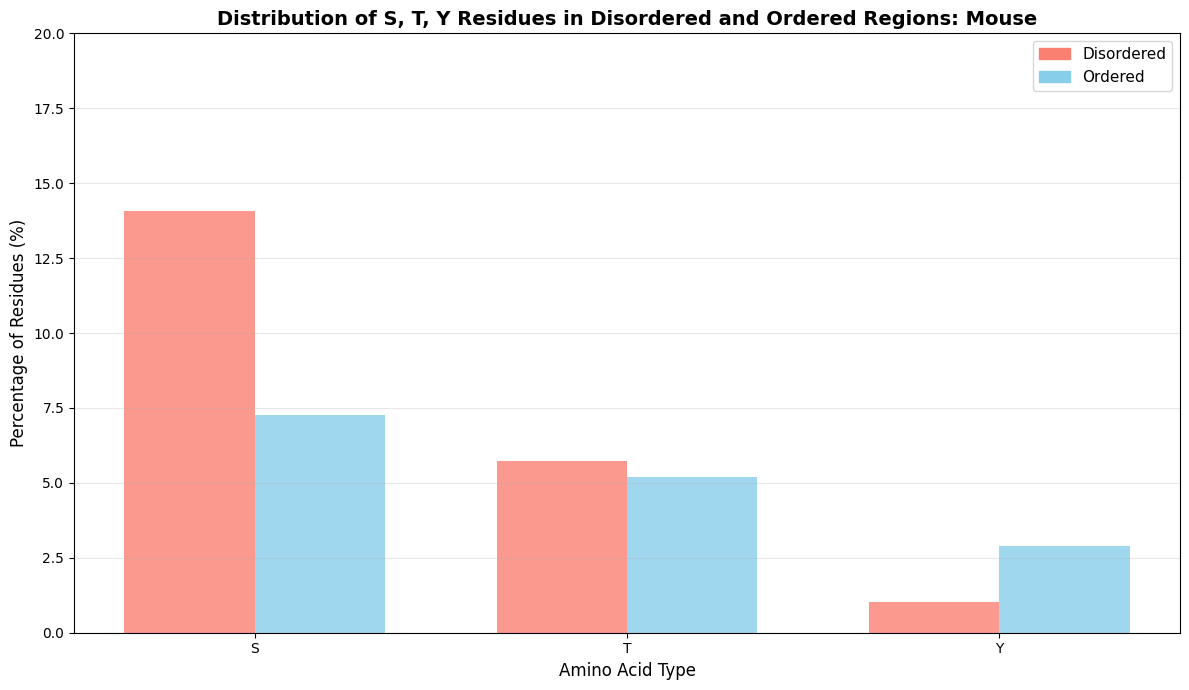

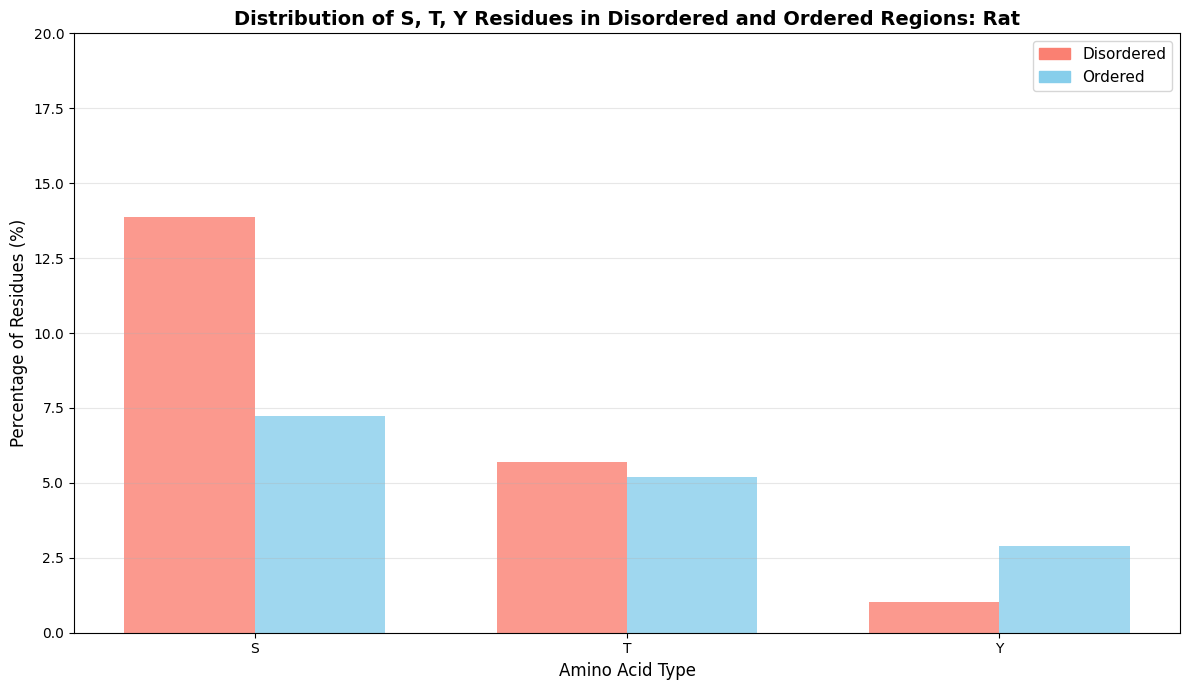

In [44]:
# Distribution of S, T, Y residues in disordered and ordered regions compared to all amino acids


print(f"\nMouse data:")
Mouse_percentage_s_disordered = (Mouse_s_disordered / Mouse_total_disordered) * 100
Mouse_percentage_s_ordered = (Mouse_s_ordered / Mouse_total_ordered) * 100
Mouse_percentage_t_disordered = (Mouse_t_disordered / Mouse_total_disordered) * 100
Mouse_percentage_t_ordered = (Mouse_t_ordered / Mouse_total_ordered) * 100
Mouse_percentage_y_disordered = (Mouse_y_disordered / Mouse_total_disordered) * 100
Mouse_percentage_y_ordered = (Mouse_y_ordered / Mouse_total_ordered) * 100
print(f"percentage of all residues in disordered regions that are S: {Mouse_percentage_s_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are S: {Mouse_percentage_s_ordered:.1f}%")
print(f"percentage of all residues in disordered regions that are T: {Mouse_percentage_t_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are T: {Mouse_percentage_t_ordered:.1f}%")
print(f"percentage of all residues in disordered regions that are Y: {Mouse_percentage_y_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are Y: {Mouse_percentage_y_ordered:.1f}%")
print(f"\npercentage of all residues in disordered regions that are S, T, or Y: {Mouse_percentage_s_disordered + Mouse_percentage_t_disordered + Mouse_percentage_y_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are S, T, or Y: {Mouse_percentage_s_ordered + Mouse_percentage_t_ordered + Mouse_percentage_y_ordered:.1f}%")

print(f"\nRat data:")
Rat_percentage_s_disordered = (Rat_s_disordered / Rat_total_disordered) * 100
Rat_percentage_s_ordered = (Rat_s_ordered / Rat_total_ordered) * 100
Rat_percentage_t_disordered = (Rat_t_disordered / Rat_total_disordered) * 100
Rat_percentage_t_ordered = (Rat_t_ordered / Rat_total_ordered) * 100
Rat_percentage_y_disordered = (Rat_y_disordered / Rat_total_disordered) * 100
Rat_percentage_y_ordered = (Rat_y_ordered / Rat_total_ordered) * 100
print(f"percentage of all residues in disordered regions that are S: {Rat_percentage_s_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are S: {Rat_percentage_s_ordered:.1f}%")
print(f"percentage of all residues in disordered regions that are T: {Rat_percentage_t_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are T: {Rat_percentage_t_ordered:.1f}%")
print(f"percentage of all residues in disordered regions that are Y: {Rat_percentage_y_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are Y: {Rat_percentage_y_ordered:.1f}%")
print(f"\npercentage of all residues in disordered regions that are S, T, or Y: {Rat_percentage_s_disordered + Rat_percentage_t_disordered + Rat_percentage_y_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are S, T, or Y: {Rat_percentage_s_ordered + Rat_percentage_t_ordered + Rat_percentage_y_ordered:.1f}%")


# Create visualization of S, T, Y percentages in disordered and ordered regions
fig1 = plt.figure(figsize=(12, 7))
categories = ['S', 'T', 'Y']
mouse_disordered_percentages = [Mouse_percentage_s_disordered, Mouse_percentage_t_disordered, Mouse_percentage_y_disordered]
mouse_ordered_percentages = [Mouse_percentage_s_ordered, Mouse_percentage_t_ordered, Mouse_percentage_y_ordered]

x = np.arange(len(categories))
width = 0.35

bars1 = plt.bar(x - width/2, mouse_disordered_percentages, width, 
                color='salmon', alpha=0.8)
bars2 = plt.bar(x + width/2, mouse_ordered_percentages, width, 
                color='skyblue', alpha=0.8)

plt.xlabel('Amino Acid Type', fontsize=12)
plt.ylabel('Percentage of Residues (%)', fontsize=12)
plt.title('Distribution of S, T, Y Residues in Disordered and Ordered Regions: Mouse', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 20)

plt.legend(handles=[
    mpatches.Patch(color='salmon', label='Disordered'),
    mpatches.Patch(color='skyblue', label='Ordered')
], loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()


fig1 = plt.figure(figsize=(12, 7))
categories = ['S', 'T', 'Y']
Rat_disordered_percentages = [Rat_percentage_s_disordered, Rat_percentage_t_disordered, Rat_percentage_y_disordered]
Rat_ordered_percentages = [Rat_percentage_s_ordered, Rat_percentage_t_ordered, Rat_percentage_y_ordered]

x = np.arange(len(categories))
width = 0.35

bars1 = plt.bar(x - width/2, Rat_disordered_percentages, width, 
                color='salmon', alpha=0.8)
bars2 = plt.bar(x + width/2, Rat_ordered_percentages, width, 
                color='skyblue', alpha=0.8)

plt.xlabel('Amino Acid Type', fontsize=12)
plt.ylabel('Percentage of Residues (%)', fontsize=12)
plt.title('Distribution of S, T, Y Residues in Disordered and Ordered Regions: Rat', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 20)

plt.legend(handles=[
    mpatches.Patch(color='salmon', label='Disordered'),
    mpatches.Patch(color='skyblue', label='Ordered')
], loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()








Mouse data:

Phosphorylated S in disordered regions: 16417
Total S residues in disordered regions: 178525
Phosphorylated S in ordered regions: 7987
Total S residues in ordered regions: 256600
Percent of S residues that are phosphorylated in disordered regions: 9.2%
Percent of S residues that are phosphorylated in ordered regions: 3.1%
Phosphorylation enrichment of S in disordered regions: 2.95x

Phosphorylated T in disordered regions: 2855
Total T residues in disordered regions: 72638
Phosphorylated T in ordered regions: 1576
Total T residues in ordered regions: 183154
Percent of T residues that are phosphorylated in disordered regions: 3.9%
Percent of T residues that are phosphorylated in ordered regions: 0.9%
Phosphorylation enrichment of T in disordered regions: 4.57x

Phosphorylated Y in disordered regions: 245
Total Y residues in disordered regions: 12972
Phosphorylated Y in ordered regions: 404
Total Y residues in ordered regions: 102144
Percent of Y residues that are phosphoryl

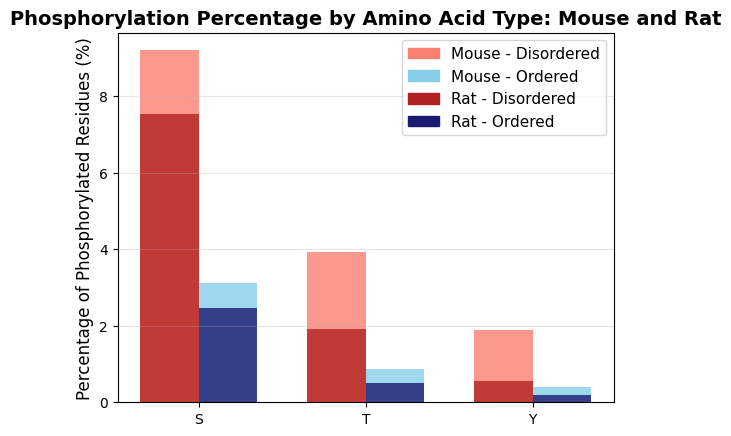

In [37]:
# Distribution of phosphorylated S, T, Y residues in disordered and ordered regions compared to
# all potential phosphorylation sites for that residue

print(f"\nMouse data:")

# Mouse data Phosphorylation per amino acid type percentages:
PM_s_disordered_count = len(df_mouse[(df_mouse['disordered?'] == 1) & (df_mouse['amino_acid'] == 'S')])
PM_s_ordered_count = len(df_mouse[(df_mouse['disordered?'] == 0) & (df_mouse['amino_acid'] == 'S')])
#Calculation of percent of disordere and ordered S residues that are phosphorylated
PM_s_disordered_pct = (PM_s_disordered_count / Mouse_s_disordered) * 100
PM_s_ordered_pct = (PM_s_ordered_count / Mouse_s_ordered) * 100
#Phosphorylation enrichment in disordered regions:
PM_s_enrichment_ratio = PM_s_disordered_pct / PM_s_ordered_pct

print(f"\nPhosphorylated S in disordered regions: {PM_s_disordered_count}")
print(f"Total S residues in disordered regions: {Mouse_s_disordered}")
print(f"Phosphorylated S in ordered regions: {PM_s_ordered_count}")
print(f"Total S residues in ordered regions: {Mouse_s_ordered}")
print(f"Percent of S residues that are phosphorylated in disordered regions: {PM_s_disordered_pct:.1f}%")
print(f"Percent of S residues that are phosphorylated in ordered regions: {PM_s_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of S in disordered regions: {PM_s_enrichment_ratio:.2f}x")

PM_t_disordered_count = len(df_mouse[(df_mouse['disordered?'] == 1) & (df_mouse['amino_acid'] == 'T')])
PM_t_ordered_count = len(df_mouse[(df_mouse['disordered?'] == 0) & (df_mouse['amino_acid'] == 'T')])
PM_t_disordered_pct = (PM_t_disordered_count / Mouse_t_disordered) * 100
PM_t_ordered_pct = (PM_t_ordered_count / Mouse_t_ordered) * 100
PM_t_enrichment_ratio = PM_t_disordered_pct / PM_t_ordered_pct

print(f"\nPhosphorylated T in disordered regions: {PM_t_disordered_count}")
print(f"Total T residues in disordered regions: {Mouse_t_disordered}")
print(f"Phosphorylated T in ordered regions: {PM_t_ordered_count}")
print(f"Total T residues in ordered regions: {Mouse_t_ordered}")
print(f"Percent of T residues that are phosphorylated in disordered regions: {PM_t_disordered_pct:.1f}%")
print(f"Percent of T residues that are phosphorylated in ordered regions: {PM_t_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of T in disordered regions: {PM_t_enrichment_ratio:.2f}x")

PM_y_disordered_count = len(df_mouse[(df_mouse['disordered?'] == 1) & (df_mouse['amino_acid'] == 'Y')])
PM_y_ordered_count = len(df_mouse[(df_mouse['disordered?'] == 0) & (df_mouse['amino_acid'] == 'Y')])
PM_y_disordered_pct = (PM_y_disordered_count / Mouse_y_disordered) * 100
PM_y_ordered_pct = (PM_y_ordered_count / Mouse_y_ordered) * 100
PM_y_enrichment_ratio = PM_y_disordered_pct / PM_y_ordered_pct

print(f"\nPhosphorylated Y in disordered regions: {PM_y_disordered_count}")
print(f"Total Y residues in disordered regions: {Mouse_y_disordered}")
print(f"Phosphorylated Y in ordered regions: {PM_y_ordered_count}")
print(f"Total Y residues in ordered regions: {Mouse_y_ordered}")
print(f"Percent of Y residues that are phosphorylated in disordered regions: {PM_y_disordered_pct:.1f}%")
print(f"Percent of Y residues that are phosphorylated in ordered regions: {PM_y_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of Y in disordered regions: {PM_y_enrichment_ratio:.2f}x")


# Rat data Phosphorylation per amino acid type percentages:

print(f"\nRat data:")

PR_s_disordered_count = len(df_rat[(df_rat['disordered?'] == 1) & (df_rat['amino_acid'] == 'S')])
PR_s_ordered_count = len(df_rat[(df_rat['disordered?'] == 0) & (df_rat['amino_acid'] == 'S')])
#Calculation of percent of disordered and ordered S residues that are phosphorylated
PR_s_disordered_pct = (PR_s_disordered_count / Rat_s_disordered) * 100
PR_s_ordered_pct = (PR_s_ordered_count / Rat_s_ordered) * 100
#Phosphorylation enrichment in disordered regions:
PR_s_enrichment_Ratio = PR_s_disordered_pct / PR_s_ordered_pct

print(f"\nPhosphorylated S in disordered regions: {PR_s_disordered_count}")
print(f"Total S residues in disordered regions: {Rat_s_disordered}")
print(f"Phosphorylated S in ordered regions: {PR_s_ordered_count}")
print(f"Total S residues in ordered regions: {Rat_s_ordered}")
print(f"Percent of S residues that are phosphorylated in disordered regions: {PR_s_disordered_pct:.1f}%")
print(f"Percent of S residues that are phosphorylated in ordered regions: {PR_s_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of S in disordered regions: {PR_s_enrichment_Ratio:.2f}x")

PR_t_disordered_count = len(df_rat[(df_rat['disordered?'] == 1) & (df_rat['amino_acid'] == 'T')])
PR_t_ordered_count = len(df_rat[(df_rat['disordered?'] == 0) & (df_rat['amino_acid'] == 'T')])
PR_t_disordered_pct = (PR_t_disordered_count / Rat_t_disordered) * 100
PR_t_ordered_pct = (PR_t_ordered_count / Rat_t_ordered) * 100
PR_t_enrichment_Ratio = PR_t_disordered_pct / PR_t_ordered_pct

print(f"\nPhosphorylated T in disordered regions: {PR_t_disordered_count}")
print(f"Total T residues in disordered regions: {Rat_t_disordered}")
print(f"Phosphorylated T in ordered regions: {PR_t_ordered_count}")
print(f"Total T residues in ordered regions: {Rat_t_ordered}")
print(f"Percent of T residues that are phosphorylated in disordered regions: {PR_t_disordered_pct:.1f}%")
print(f"Percent of T residues that are phosphorylated in ordered regions: {PR_t_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of T in disordered regions: {PR_t_enrichment_Ratio:.2f}x")

PR_y_disordered_count = len(df_rat[(df_rat['disordered?'] == 1) & (df_rat['amino_acid'] == 'Y')])
PR_y_ordered_count = len(df_rat[(df_rat['disordered?'] == 0) & (df_rat['amino_acid'] == 'Y')])
PR_y_disordered_pct = (PR_y_disordered_count / Rat_y_disordered) * 100
PR_y_ordered_pct = (PR_y_ordered_count / Rat_y_ordered) * 100
PR_y_enrichment_Ratio = PR_y_disordered_pct / PR_y_ordered_pct

print(f"\nPhosphorylated Y in disordered regions: {PR_y_disordered_count}")
print(f"Total Y residues in disordered regions: {Rat_y_disordered}")
print(f"Phosphorylated Y in ordered regions: {PR_y_ordered_count}")
print(f"Total Y residues in ordered regions: {Rat_y_ordered}")
print(f"Percent of Y residues that are phosphorylated in disordered regions: {PR_y_disordered_pct:.1f}%")
print(f"Percent of Y residues that are phosphorylated in ordered regions: {PR_y_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of Y in disordered regions: {PR_y_enrichment_Ratio:.2f}x")

# Create visualization of Mouse phosphorylation percentages per amino acid type in ordered and disordered regions

categories = ['S', 'T', 'Y']
mouse_disordered_percentages = [PM_s_disordered_pct, PM_t_disordered_pct, PM_y_disordered_pct]
mouse_ordered_percentages = [PM_s_ordered_pct, PM_t_ordered_pct, PM_y_ordered_pct]

x = np.arange(len(categories))
width = 0.35

rat_disordered_percentages = [PR_s_disordered_pct, PR_t_disordered_pct, PR_y_disordered_pct]
rat_ordered_percentages = [PR_s_ordered_pct, PR_t_ordered_pct, PR_y_ordered_pct]

x = np.arange(len(categories))
width = 0.35

# Define colors
mouse_ordered_color = 'skyblue'
mouse_disordered_color = 'salmon'
rat_ordered_color = 'midnightblue'
rat_disordered_color = 'firebrick'

# Create bars

bars1 = plt.bar(x - width/2, mouse_disordered_percentages, width, 
                color=mouse_disordered_color, alpha=0.8)
bars2 = plt.bar(x + width/2, mouse_ordered_percentages, width, 
                color=mouse_ordered_color, alpha=0.8)
bars1 = plt.bar(x - width/2, rat_disordered_percentages, width, 
                color=rat_disordered_color, alpha=0.8)
bars2 = plt.bar(x + width/2, rat_ordered_percentages, width, 
                color=rat_ordered_color, alpha=0.8)

plt.ylabel('Percentage of Phosphorylated Residues (%)', fontsize=12)
plt.title('Phosphorylation Percentage by Amino Acid Type: Mouse and Rat', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.grid(True, alpha=0.3, axis='y')

legend_elements = [
    mpatches.Patch(color=mouse_disordered_color, label='Mouse - Disordered'),
    mpatches.Patch(color=mouse_ordered_color, label='Mouse - Ordered'),
    mpatches.Patch(color=rat_disordered_color, label='Rat - Disordered'),
    mpatches.Patch(color=rat_ordered_color, label='Rat - Ordered')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=11)


# Summary of S, T, Y enrichments
print(f"\nSUMMARY:")
print(f"Mouse data:")
print(f"S: {PM_s_enrichment_ratio:.2f}x enriched in disordered regions")
print(f"T: {PM_t_enrichment_ratio:.2f}x enriched in disordered regions")
print(f"Y: {PM_y_enrichment_ratio:.2f}x enriched in disordered regions")

print(f"\nRat data:")
print(f"S: {PR_s_enrichment_Ratio:.2f}x enriched in disordered regions")
print(f"T: {PR_t_enrichment_Ratio:.2f}x enriched in disordered regions")
print(f"Y: {PR_y_enrichment_Ratio:.2f}x enriched in disordered regions")







PHOSPHORYLATION SITES BY TISSUE COUNT AND DISORDER STATUS (MOUSE)
Loaded 30442 phosphorylation sites from mouse data
Found 30442 S/T/Y phosphorylation sites
Tissue counts found: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Tissue Count 1:
  Total sites: 13,653
  Ordered: 5,041 (36.9%)
  Disordered: 8,200 (60.1%)
  Within Ordered - S: 76.6%, T: 18.2%, Y: 5.2%
  Within Disordered - S: 81.7%, T: 16.8%, Y: 1.5%

Tissue Count 2:
  Total sites: 4,965
  Ordered: 1,644 (33.1%)
  Disordered: 3,187 (64.2%)
  Within Ordered - S: 82.7%, T: 14.2%, Y: 3.2%
  Within Disordered - S: 85.2%, T: 13.7%, Y: 1.1%

Tissue Count 3:
  Total sites: 3,101
  Ordered: 979 (31.6%)
  Disordered: 1,990 (64.2%)
  Within Ordered - S: 81.6%, T: 15.4%, Y: 3.0%
  Within Disordered - S: 83.8%, T: 14.6%, Y: 1.6%

Tissue Count 4:
  Total sites: 2,214
  Ordered: 645 (29.1%)
  Disordered: 1,522 (68.7%)
  Within Ordered - S: 86.0%, T: 10.9%, Y: 3.1%
  Wit

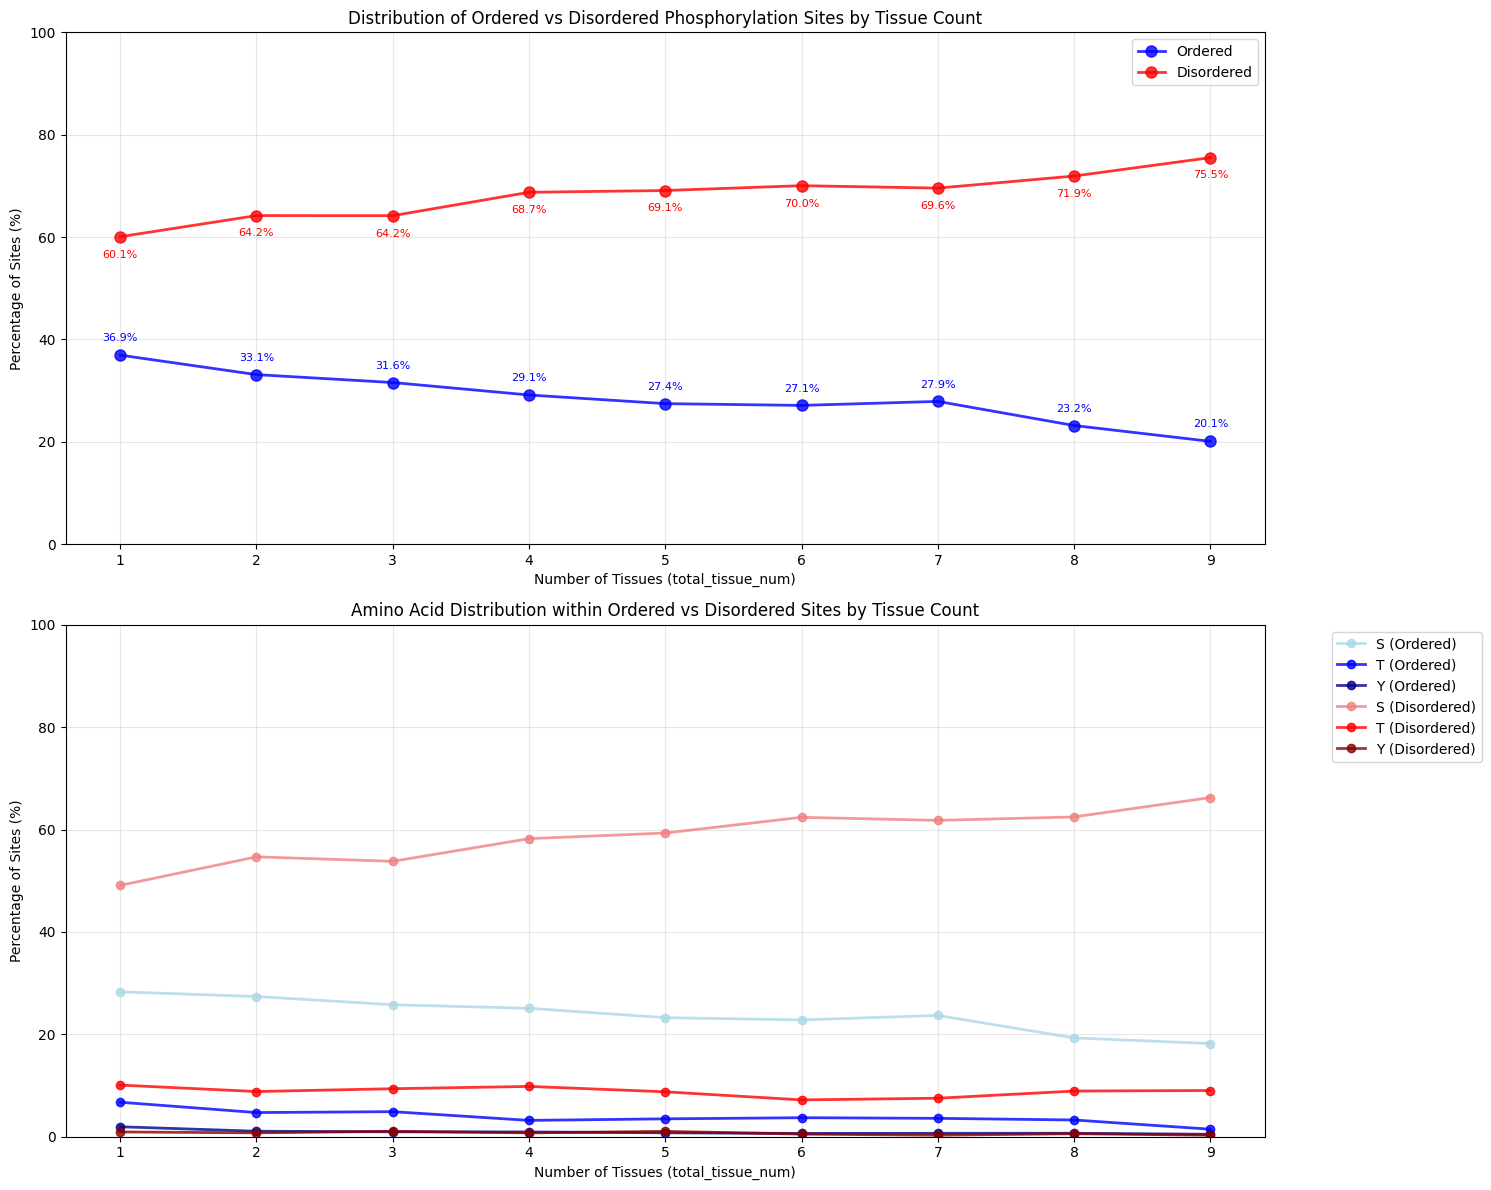


SUMMARY STATISTICS:
Overall distribution:
  Total sites: 30,442
  Ordered: 9,967 (32.7%)
  Disordered: 19,517 (64.1%)

Most common tissue count: 1 tissues (13,653.0 sites)
Sites in all 9 tissues: 1,111.0 sites
  Ordered: 20.1%
  Disordered: 75.5%


In [ ]:
# Distribution of phosphorylation sites by tissue count and disorder status (MOUSE)

import seaborn as sns


# Load the mouse disorder data
mouse_disorder_file = '../data/processed/mouse/full_disorder.csv'

if not os.path.exists(mouse_disorder_file):
    print(f"Error: Mouse disorder file not found: {mouse_disorder_file}")
    print("Please run the integration script first to generate the required data.")
else:
    df_mouse = pd.read_csv(mouse_disorder_file)
    print(f"Loaded {len(df_mouse)} phosphorylation sites from mouse data")
    
    # Filter for S, T, Y residues only
    df_mouse_sty = df_mouse[df_mouse['amino_acid'].isin(['S', 'T', 'Y'])]
    print(f"Found {len(df_mouse_sty)} S/T/Y phosphorylation sites")
    
    # Use the existing total_tissue_num column
    # Get unique tissue counts and sort them
    unique_tissue_counts = sorted(df_mouse_sty['total_tissue_num'].unique())
    print(f"Tissue counts found: {unique_tissue_counts}")
    
    # Prepare data for visualization
    results = []
    
    for tissue_count in unique_tissue_counts:
        # Filter sites present in this many tissues
        sites_in_count = df_mouse_sty[df_mouse_sty['total_tissue_num'] == tissue_count]
        
        if len(sites_in_count) == 0:
            continue
            
        # Count ordered vs disordered
        ordered_sites = sites_in_count[sites_in_count['disordered?'] == 0]
        disordered_sites = sites_in_count[sites_in_count['disordered?'] == 1]
        
        total_sites = len(sites_in_count)
        ordered_pct = (len(ordered_sites) / total_sites) * 100
        disordered_pct = (len(disordered_sites) / total_sites) * 100
        
        # Within ordered sites, count S, T, Y
        ordered_s = len(ordered_sites[ordered_sites['amino_acid'] == 'S'])
        ordered_t = len(ordered_sites[ordered_sites['amino_acid'] == 'T'])
        ordered_y = len(ordered_sites[ordered_sites['amino_acid'] == 'Y'])
        
        # Within disordered sites, count S, T, Y
        disordered_s = len(disordered_sites[disordered_sites['amino_acid'] == 'S'])
        disordered_t = len(disordered_sites[disordered_sites['amino_acid'] == 'T'])
        disordered_y = len(disordered_sites[disordered_sites['amino_acid'] == 'Y'])
        
        # Calculate percentages within each category
        if len(ordered_sites) > 0:
            ordered_s_pct = (ordered_s / len(ordered_sites)) * 100
            ordered_t_pct = (ordered_t / len(ordered_sites)) * 100
            ordered_y_pct = (ordered_y / len(ordered_sites)) * 100
        else:
            ordered_s_pct = ordered_t_pct = ordered_y_pct = 0
            
        if len(disordered_sites) > 0:
            disordered_s_pct = (disordered_s / len(disordered_sites)) * 100
            disordered_t_pct = (disordered_t / len(disordered_sites)) * 100
            disordered_y_pct = (disordered_y / len(disordered_sites)) * 100
        else:
            disordered_s_pct = disordered_t_pct = disordered_y_pct = 0
        
        results.append({
            'tissue_count': tissue_count,
            'total_sites': total_sites,
            'ordered_pct': ordered_pct,
            'disordered_pct': disordered_pct,
            'ordered_s_pct': ordered_s_pct,
            'ordered_t_pct': ordered_t_pct,
            'ordered_y_pct': ordered_y_pct,
            'disordered_s_pct': disordered_s_pct,
            'disordered_t_pct': disordered_t_pct,
            'disordered_y_pct': disordered_y_pct,
            'ordered_sites': len(ordered_sites),
            'disordered_sites': len(disordered_sites)
        })
        
        print(f"\nTissue Count {tissue_count}:")
        print(f"  Total sites: {total_sites:,}")
        print(f"  Ordered: {len(ordered_sites):,} ({ordered_pct:.1f}%)")
        print(f"  Disordered: {len(disordered_sites):,} ({disordered_pct:.1f}%)")
        print(f"  Within Ordered - S: {ordered_s_pct:.1f}%, T: {ordered_t_pct:.1f}%, Y: {ordered_y_pct:.1f}%")
        print(f"  Within Disordered - S: {disordered_s_pct:.1f}%, T: {disordered_t_pct:.1f}%, Y: {disordered_y_pct:.1f}%")
    
    # Create visualization
    results_df = pd.DataFrame(results)
    
    # Create the main plot with dot and line graphs
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Ordered vs Disordered percentages as line plot
    tissue_counts = results_df['tissue_count'].values
    
    # Plot lines with dots
    ax1.plot(tissue_counts, results_df['ordered_pct'], 'o-', label='Ordered', color='blue', linewidth=2, markersize=8, alpha=0.8)
    ax1.plot(tissue_counts, results_df['disordered_pct'], 'o-', label='Disordered', color='red', linewidth=2, markersize=8, alpha=0.8)
    
    ax1.set_xlabel('Number of Tissues (total_tissue_num)')
    ax1.set_ylabel('Percentage of Sites (%)')
    ax1.set_title('Distribution of Ordered vs Disordered Phosphorylation Sites by Tissue Count')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 100)
    
    # Add value labels on points
    for i, (tissue_count, ordered_pct, disordered_pct) in enumerate(zip(tissue_counts, results_df['ordered_pct'], results_df['disordered_pct'])):
        ax1.annotate(f'{ordered_pct:.1f}%', (tissue_count, ordered_pct), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')
        ax1.annotate(f'{disordered_pct:.1f}%', (tissue_count, disordered_pct), 
                    textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8, color='red')
    
    # Plot 2: Amino acid distribution within ordered and disordered as line plots
    # Ordered sites - S, T, Y breakdown
    ordered_s_pct = results_df['ordered_pct'] * results_df['ordered_s_pct'] / 100
    ordered_t_pct = results_df['ordered_pct'] * results_df['ordered_t_pct'] / 100
    ordered_y_pct = results_df['ordered_pct'] * results_df['ordered_y_pct'] / 100
    
    # Disordered sites - S, T, Y breakdown
    disordered_s_pct = results_df['disordered_pct'] * results_df['disordered_s_pct'] / 100
    disordered_t_pct = results_df['disordered_pct'] * results_df['disordered_t_pct'] / 100
    disordered_y_pct = results_df['disordered_pct'] * results_df['disordered_y_pct'] / 100
    
    # Plot ordered sites
    ax2.plot(tissue_counts, ordered_s_pct, 'o-', label='S (Ordered)', color='lightblue', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, ordered_t_pct, 'o-', label='T (Ordered)', color='blue', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, ordered_y_pct, 'o-', label='Y (Ordered)', color='darkblue', linewidth=2, markersize=6, alpha=0.8)
    
    # Plot disordered sites
    ax2.plot(tissue_counts, disordered_s_pct, 'o-', label='S (Disordered)', color='lightcoral', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, disordered_t_pct, 'o-', label='T (Disordered)', color='red', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, disordered_y_pct, 'o-', label='Y (Disordered)', color='darkred', linewidth=2, markersize=6, alpha=0.8)
    
    ax2.set_xlabel('Number of Tissues (total_tissue_num)')
    ax2.set_ylabel('Percentage of Sites (%)')
    ax2.set_title('Amino Acid Distribution within Ordered vs Disordered Sites by Tissue Count')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\n" + "="*60)
    print("SUMMARY STATISTICS:")
    print("="*60)
    
    # Overall statistics
    total_ordered = df_mouse_sty[df_mouse_sty['disordered?'] == 0]
    total_disordered = df_mouse_sty[df_mouse_sty['disordered?'] == 1]
    
    print(f"Overall distribution:")
    print(f"  Total sites: {len(df_mouse_sty):,}")
    print(f"  Ordered: {len(total_ordered):,} ({len(total_ordered)/len(df_mouse_sty)*100:.1f}%)")
    print(f"  Disordered: {len(total_disordered):,} ({len(total_disordered)/len(df_mouse_sty)*100:.1f}%)")
    
    # Most common tissue counts
    most_common = results_df.loc[results_df['total_sites'].idxmax()]
    print(f"\nMost common tissue count: {int(most_common['tissue_count'])} tissues ({most_common['total_sites']:,} sites)")
    
    # Sites in all tissues
    all_tissues = results_df[results_df['tissue_count'] == max(results_df['tissue_count'])]
    if len(all_tissues) > 0:
        all_tissue_data = all_tissues.iloc[0]
        print(f"Sites in all {int(all_tissue_data['tissue_count'])} tissues: {all_tissue_data['total_sites']:,} sites")
        print(f"  Ordered: {all_tissue_data['ordered_pct']:.1f}%")
        print(f"  Disordered: {all_tissue_data['disordered_pct']:.1f}%")


PHOSPHORYLATION SITES BY TISSUE COUNT AND DISORDER STATUS (RAT) - FINAL CORRECTED
Loaded 23004 phosphorylation sites from rat data
Found 23004 S/T/Y phosphorylation sites
Calculated total_tissue_num from 14 tissue columns
Note: Only counting 1.0 values (tissue presence), ignoring NaN values
Sites with 0 tissue count (excluded from analysis): 36
After filtering out 0-tissue sites: 22968 S/T/Y phosphorylation sites
Tissue counts found: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]

Verification - Sample of tissue counts:
  amino_acid  all_brain  testicle  pancreas  stomach  liver  fat  intestine  \
0          T        NaN       1.0       NaN      NaN    NaN  NaN        NaN   
1          T        NaN       1.0       NaN      NaN    NaN  NaN        NaN   
2          S        NaN       1.0       NaN      NaN    NaN  NaN        NaN   
3          S        NaN       NaN       NaN      NaN    NaN  NaN        NaN   
4          S        NaN       1.0       NaN      N

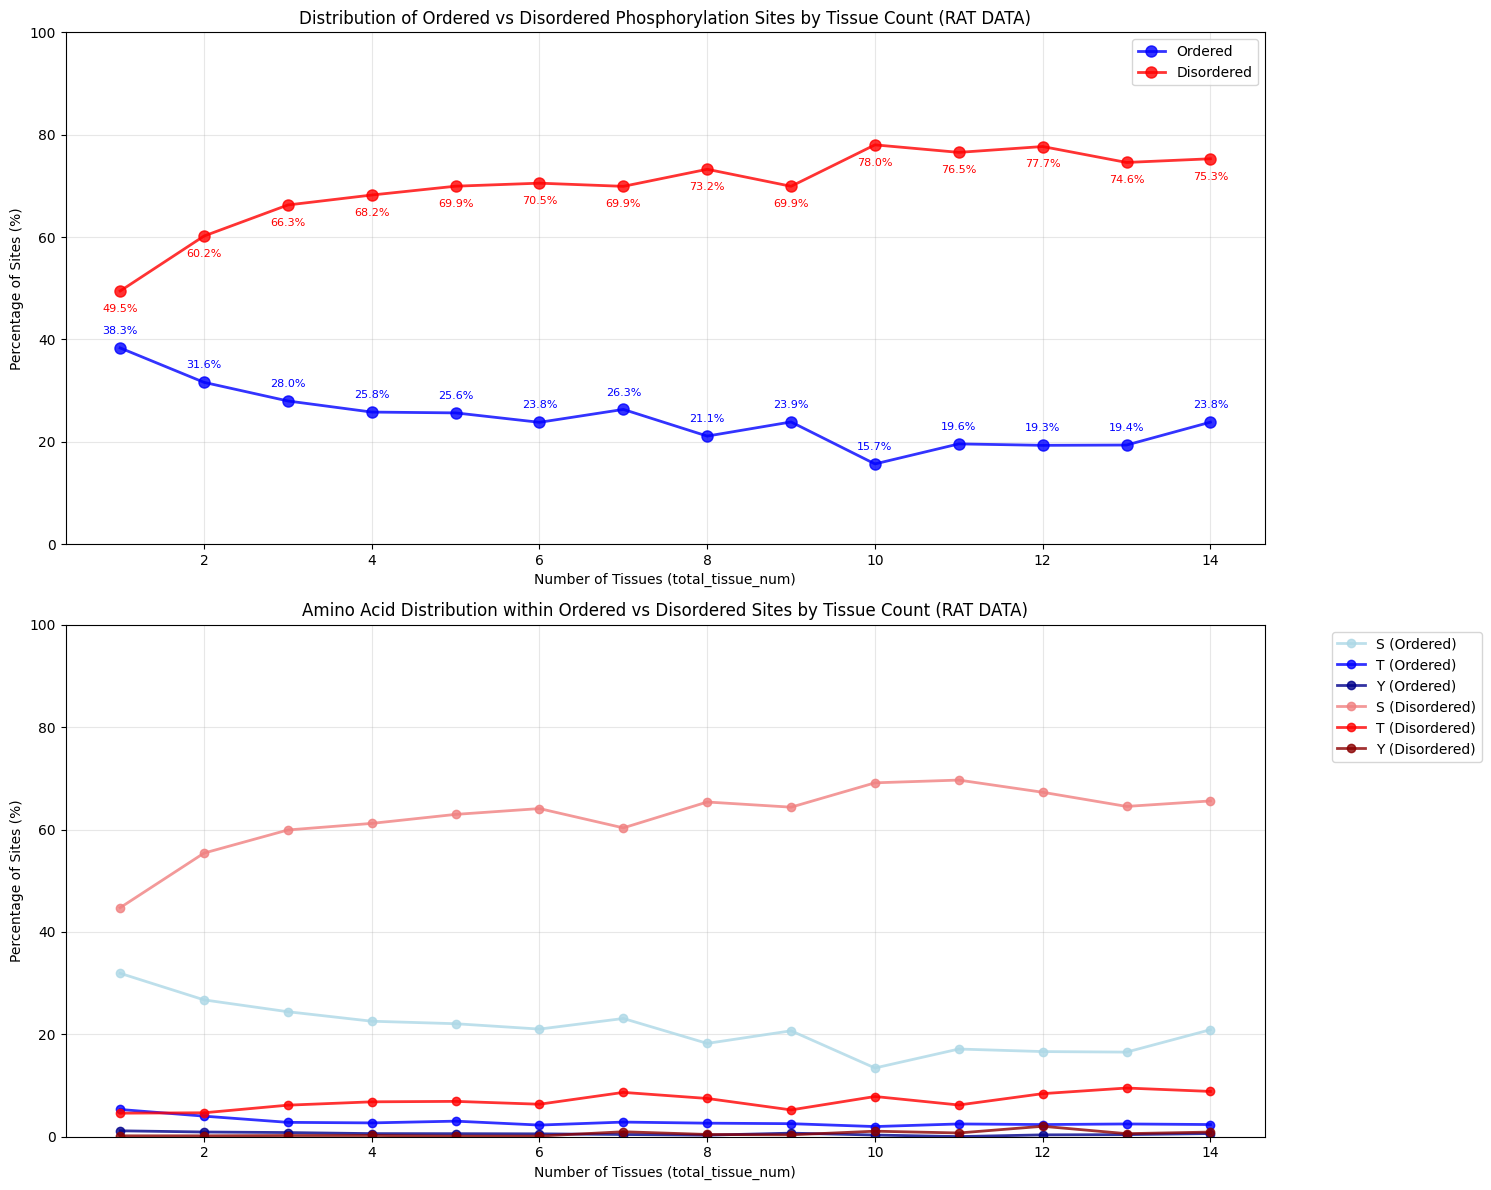


SUMMARY STATISTICS:
Overall distribution:
  Total sites: 22,968
  Ordered: 7,117 (31.0%)
  Disordered: 13,890 (60.5%)

Most common tissue count: 1 tissues (9,575.0 sites)
Sites in all 14 tissues: 340.0 sites
  Ordered: 23.8%
  Disordered: 75.3%


In [ ]:
# Cell 14: Phosphorylation sites by tissue count and disorder status (RAT DATA) - FINAL CORRECTED
# Analysis of sites present in 1, 2, 3... tissues and their disorder/order distribution
# Excludes sites with 0 tissue count (not found in any tissue)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("=" * 80)
print("PHOSPHORYLATION SITES BY TISSUE COUNT AND DISORDER STATUS (RAT) - FINAL CORRECTED")
print("=" * 80)

# Load the rat disorder data
rat_disorder_file = '../data/processed/rat/full_disorder.csv'

if not os.path.exists(rat_disorder_file):
    print(f"Error: Rat disorder file not found: {rat_disorder_file}")
    print("Please run the integration script first to generate the required data.")
else:
    df_rat = pd.read_csv(rat_disorder_file)
    print(f"Loaded {len(df_rat)} phosphorylation sites from rat data")
    
    # Filter for S, T, Y residues only
    df_rat_sty = df_rat[df_rat['amino_acid'].isin(['S', 'T', 'Y'])]
    print(f"Found {len(df_rat_sty)} S/T/Y phosphorylation sites")
    
    # Define tissue columns (excluding individual brain regions, using all_brain instead)
    tissue_cols = ['all_brain', 'testicle', 'pancreas', 'stomach', 'liver', 'fat', 
                   'intestine', 'kidney', 'spleen', 'thymus', 'lung', 'muscle', 'heart', 'blood']
    
    # Calculate total_tissue_num - CORRECTED VERSION
    # Fill NaN values with 0, then sum to count only 1.0 values (tissue presence)
    df_rat_sty['total_tissue_num'] = df_rat_sty[tissue_cols].fillna(0).sum(axis=1)
    print(f"Calculated total_tissue_num from {len(tissue_cols)} tissue columns")
    print(f"Note: Only counting 1.0 values (tissue presence), ignoring NaN values")
    
    # Filter out sites with 0 tissue count (not found in any tissue)
    sites_with_zero_tissue = len(df_rat_sty[df_rat_sty['total_tissue_num'] == 0])
    print(f"Sites with 0 tissue count (excluded from analysis): {sites_with_zero_tissue}")
    
    df_rat_sty = df_rat_sty[df_rat_sty['total_tissue_num'] > 0]
    print(f"After filtering out 0-tissue sites: {len(df_rat_sty)} S/T/Y phosphorylation sites")
    
    # Get unique tissue counts and sort them
    unique_tissue_counts = sorted(df_rat_sty['total_tissue_num'].unique())
    print(f"Tissue counts found: {unique_tissue_counts}")
    
    # Verify the calculation worked correctly
    print(f"\nVerification - Sample of tissue counts:")
    sample_data = df_rat_sty[['amino_acid'] + tissue_cols + ['total_tissue_num']].head(10)
    print(sample_data)
    
    # Prepare data for visualization
    results = []
    
    for tissue_count in unique_tissue_counts:
        # Filter sites present in this many tissues
        sites_in_count = df_rat_sty[df_rat_sty['total_tissue_num'] == tissue_count]
        
        if len(sites_in_count) == 0:
            continue
            
        # Count ordered vs disordered
        ordered_sites = sites_in_count[sites_in_count['disordered?'] == 0]
        disordered_sites = sites_in_count[sites_in_count['disordered?'] == 1]
        
        total_sites = len(sites_in_count)
        ordered_pct = (len(ordered_sites) / total_sites) * 100
        disordered_pct = (len(disordered_sites) / total_sites) * 100
        
        # Within ordered sites, count S, T, Y
        ordered_s = len(ordered_sites[ordered_sites['amino_acid'] == 'S'])
        ordered_t = len(ordered_sites[ordered_sites['amino_acid'] == 'T'])
        ordered_y = len(ordered_sites[ordered_sites['amino_acid'] == 'Y'])
        
        # Within disordered sites, count S, T, Y
        disordered_s = len(disordered_sites[disordered_sites['amino_acid'] == 'S'])
        disordered_t = len(disordered_sites[disordered_sites['amino_acid'] == 'T'])
        disordered_y = len(disordered_sites[disordered_sites['amino_acid'] == 'Y'])
        
        # Calculate percentages within each category
        if len(ordered_sites) > 0:
            ordered_s_pct = (ordered_s / len(ordered_sites)) * 100
            ordered_t_pct = (ordered_t / len(ordered_sites)) * 100
            ordered_y_pct = (ordered_y / len(ordered_sites)) * 100
        else:
            ordered_s_pct = ordered_t_pct = ordered_y_pct = 0
            
        if len(disordered_sites) > 0:
            disordered_s_pct = (disordered_s / len(disordered_sites)) * 100
            disordered_t_pct = (disordered_t / len(disordered_sites)) * 100
            disordered_y_pct = (disordered_y / len(disordered_sites)) * 100
        else:
            disordered_s_pct = disordered_t_pct = disordered_y_pct = 0
        
        results.append({
            'tissue_count': tissue_count,
            'total_sites': total_sites,
            'ordered_pct': ordered_pct,
            'disordered_pct': disordered_pct,
            'ordered_s_pct': ordered_s_pct,
            'ordered_t_pct': ordered_t_pct,
            'ordered_y_pct': ordered_y_pct,
            'disordered_s_pct': disordered_s_pct,
            'disordered_t_pct': disordered_t_pct,
            'disordered_y_pct': disordered_y_pct,
            'ordered_sites': len(ordered_sites),
            'disordered_sites': len(disordered_sites)
        })
        
        print(f"\nTissue Count {tissue_count}:")
        print(f"  Total sites: {total_sites:,}")
        print(f"  Ordered: {len(ordered_sites):,} ({ordered_pct:.1f}%)")
        print(f"  Disordered: {len(disordered_sites):,} ({disordered_pct:.1f}%)")
        print(f"  Within Ordered - S: {ordered_s_pct:.1f}%, T: {ordered_t_pct:.1f}%, Y: {ordered_y_pct:.1f}%")
        print(f"  Within Disordered - S: {disordered_s_pct:.1f}%, T: {disordered_t_pct:.1f}%, Y: {disordered_y_pct:.1f}%")
    
    # Create visualization
    results_df = pd.DataFrame(results)
    
    # Create the main plot with dot and line graphs
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Ordered vs Disordered percentages as line plot
    tissue_counts = results_df['tissue_count'].values
    
    # Plot lines with dots
    ax1.plot(tissue_counts, results_df['ordered_pct'], 'o-', label='Ordered', color='blue', linewidth=2, markersize=8, alpha=0.8)
    ax1.plot(tissue_counts, results_df['disordered_pct'], 'o-', label='Disordered', color='red', linewidth=2, markersize=8, alpha=0.8)
    
    ax1.set_xlabel('Number of Tissues (total_tissue_num)')
    ax1.set_ylabel('Percentage of Sites (%)')
    ax1.set_title('Distribution of Ordered vs Disordered Phosphorylation Sites by Tissue Count (RAT DATA)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 100)
    
    # Add value labels on points
    for i, (tissue_count, ordered_pct, disordered_pct) in enumerate(zip(tissue_counts, results_df['ordered_pct'], results_df['disordered_pct'])):
        ax1.annotate(f'{ordered_pct:.1f}%', (tissue_count, ordered_pct), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')
        ax1.annotate(f'{disordered_pct:.1f}%', (tissue_count, disordered_pct), 
                    textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8, color='red')
    
    # Plot 2: Amino acid distribution within ordered and disordered as line plots
    # Ordered sites - S, T, Y breakdown
    ordered_s_pct = results_df['ordered_pct'] * results_df['ordered_s_pct'] / 100
    ordered_t_pct = results_df['ordered_pct'] * results_df['ordered_t_pct'] / 100
    ordered_y_pct = results_df['ordered_pct'] * results_df['ordered_y_pct'] / 100
    
    # Disordered sites - S, T, Y breakdown
    disordered_s_pct = results_df['disordered_pct'] * results_df['disordered_s_pct'] / 100
    disordered_t_pct = results_df['disordered_pct'] * results_df['disordered_t_pct'] / 100
    disordered_y_pct = results_df['disordered_pct'] * results_df['disordered_y_pct'] / 100
    
    # Plot ordered sites
    ax2.plot(tissue_counts, ordered_s_pct, 'o-', label='S (Ordered)', color='lightblue', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, ordered_t_pct, 'o-', label='T (Ordered)', color='blue', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, ordered_y_pct, 'o-', label='Y (Ordered)', color='darkblue', linewidth=2, markersize=6, alpha=0.8)
    
    # Plot disordered sites
    ax2.plot(tissue_counts, disordered_s_pct, 'o-', label='S (Disordered)', color='lightcoral', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, disordered_t_pct, 'o-', label='T (Disordered)', color='red', linewidth=2, markersize=6, alpha=0.8)
    ax2.plot(tissue_counts, disordered_y_pct, 'o-', label='Y (Disordered)', color='darkred', linewidth=2, markersize=6, alpha=0.8)
    
    ax2.set_xlabel('Number of Tissues (total_tissue_num)')
    ax2.set_ylabel('Percentage of Sites (%)')
    ax2.set_title('Amino Acid Distribution within Ordered vs Disordered Sites by Tissue Count (RAT DATA)')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\n" + "="*60)
    print("SUMMARY STATISTICS:")
    print("="*60)
    
    # Overall statistics
    total_ordered = df_rat_sty[df_rat_sty['disordered?'] == 0]
    total_disordered = df_rat_sty[df_rat_sty['disordered?'] == 1]
    
    print(f"Overall distribution:")
    print(f"  Total sites: {len(df_rat_sty):,}")
    print(f"  Ordered: {len(total_ordered):,} ({len(total_ordered)/len(df_rat_sty)*100:.1f}%)")
    print(f"  Disordered: {len(total_disordered):,} ({len(total_disordered)/len(df_rat_sty)*100:.1f}%)")
    
    # Most common tissue counts
    most_common = results_df.loc[results_df['total_sites'].idxmax()]
    print(f"\nMost common tissue count: {int(most_common['tissue_count'])} tissues ({most_common['total_sites']:,} sites)")
    
    # Sites in all tissues
    all_tissues = results_df[results_df['tissue_count'] == max(results_df['tissue_count'])]
    if len(all_tissues) > 0:
        all_tissue_data = all_tissues.iloc[0]
        print(f"Sites in all {int(all_tissue_data['tissue_count'])} tissues: {all_tissue_data['total_sites']:,} sites")
        print(f"  Ordered: {all_tissue_data['ordered_pct']:.1f}%")
        print(f"  Disordered: {all_tissue_data['disordered_pct']:.1f}%")
